# Sales Analysis
## Introduction
This notebook performs a detailed sales analysis for a company's dataset. The primary goal is to understand sales trends, identify top-selling products, and analyze customer purchase behavior over a specified period.



## Import the required libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Combine all the monthly data into one CSV

In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("All_Sales_Data/all_data.csv", index=False)

In [4]:
all_months_data = pd.read_csv("All_Sales_Data/all_data.csv")
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Questions that need to be answered :
- What was the best month for sales?How much was earned that month?
- What city had the highest number of sales?
- What time should we display advertisements to maximize likelihood of customer's buying products?
- What two products are most often sold together?
- Which Product sold the most?Why do you think it sold the most?

### Drop rows of NAN

In [5]:
# Find NAN 
nan_data = all_months_data[all_months_data.isna().any(axis=1)]
display(nan_data.head())

# Drop NAN
all_months_data = all_months_data.dropna(how='all')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it 

In [6]:
# all_months_data = all_months_data[all_months_data['Order Date'].str[:2] =='Or']
# all_months_data

all_months_data = all_months_data[all_months_data['Order Date'] != 'Or']
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
# Identify non-numeric values in the column
non_numeric_rows = all_months_data[~all_months_data['Quantity Ordered'].str.isnumeric()]
display(non_numeric_rows)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Drop rows where 'Quantity Ordered' is not numeric
all_months_data = all_months_data[all_months_data['Quantity Ordered'].str.isnumeric()]


### Make columns correct type

In [9]:
# Convert Quantity Ordered type into int
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])

# Convert price each type into float
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])

# Convert order id type into int
all_months_data['Order ID'] = pd.to_numeric(all_months_data['Order ID'])
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Augment data with additional columns

#### Add month column

In [10]:
# all_months_data['Month'] = all_months_data['Order Date'].str[:2]
# all_months_data['Month'] = all_months_data['Month'].astype('int')
# all_months_data

# professional way 
all_months_data['Month'] = pd.to_datetime(all_months_data['Order Date']).dt.month
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add sales column

In [11]:
all_months_data['Sales'] = all_months_data['Quantity Ordered'].astype(int) * all_months_data['Price Each'].astype(float)
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Add city column

In [12]:
def get_city(city):
    return city.split(',')[1]

def get_state(state):
    return state.split(',')[2].split(' ')[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question 1: What was the best month for sales?How much was earned that month?

In [13]:
df_all_data = pd.DataFrame(all_months_data)

grouped_by_month = df_all_data.groupby('Month').sum().reset_index()

max_sales = grouped_by_month['Sales'].max()
highest_month = grouped_by_month[grouped_by_month['Sales'] == max_sales]['Month'].values[0]

num_to_str={
    1  : "January",
    2  : "February",
    3  : "March",
    4  : "April",
    5  : "May",
    6  : "June",
    7  : "July",
    8  : "August",
    9  : "September",
    10 : "October",
    11 : "November",
    12 : "December"
}

month_name = num_to_str[highest_month]

print(f"The month with the maximum sales is {month_name} and the sales is {max_sales}.")


The month with the maximum sales is December and the sales is 4613443.34.


### A graph of the level of sales in each month

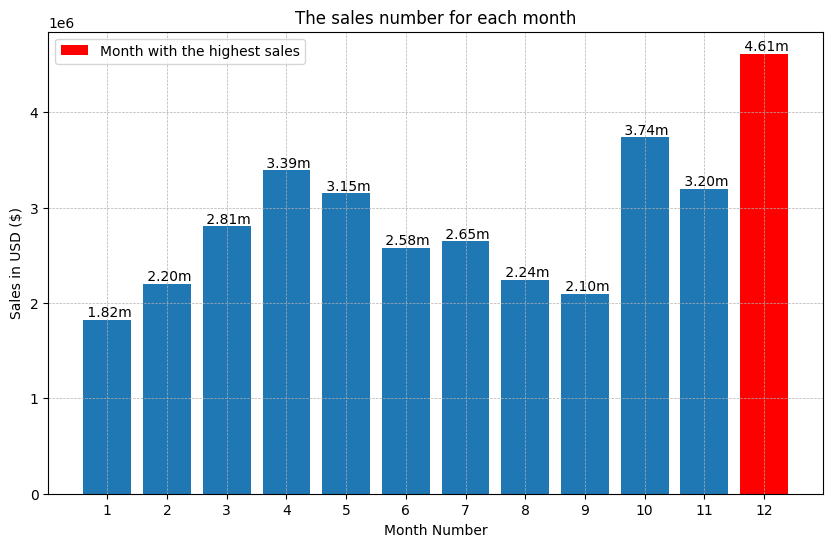

In [14]:
plt.figure(figsize=(10, 6))

range_month = range(1,13)
plt.bar(range_month , grouped_by_month['Sales'])
plt.bar(highest_month, max_sales, color='red' , label = 'Month with the highest sales')

for i, sales in enumerate(grouped_by_month['Sales']):
    plt.text(range_month[i], sales + 500, f'{(sales/1000000): .2f}m', ha='center', va='bottom')

plt.grid(True ,which='both' , linestyle='--', linewidth='0.5')
plt.xticks(range_month)

plt.title('The sales number for each month')
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')

plt.legend()
plt.show()

### Question 2: What city had the highest number of sales?

In [15]:
grouped_by_city = df_all_data.groupby('City').sum().reset_index()
max_qty_order = grouped_by_city['Quantity Ordered'].max()
highest_city = grouped_by_city[grouped_by_city['Quantity Ordered'] == max_qty_order]['City'].values[0]
print(f'The city with the highest number of sales is{highest_city}, with a total of {max_qty_order}')

The city with the highest number of sales is San Francisco (CA), with a total of 50239


### A graph of level sales in each city

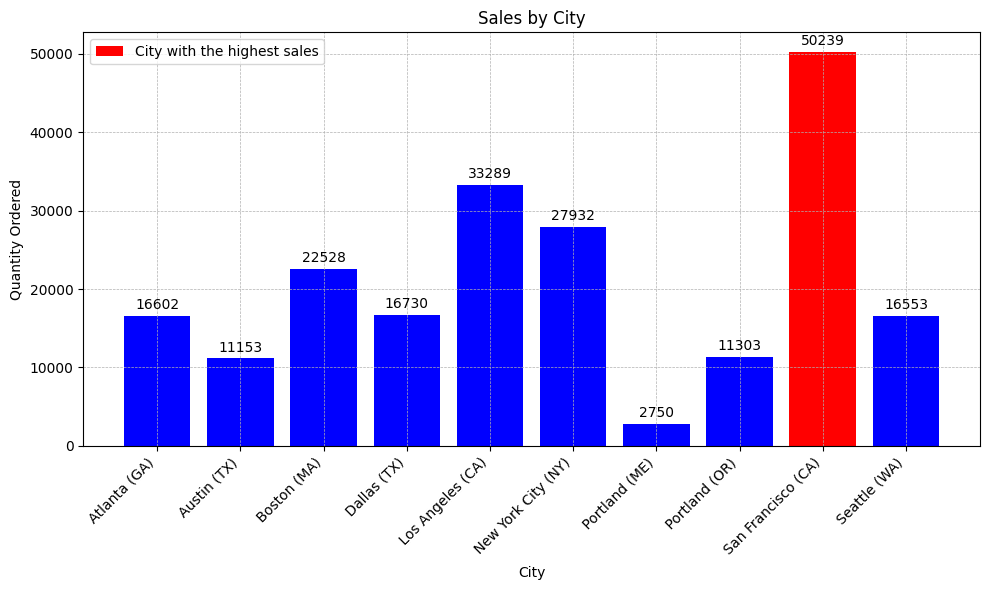

In [16]:
plt.figure(figsize=(10, 6))

# Create the bar chart with city names centered on each bar
plt.bar(grouped_by_city['City'], grouped_by_city['Quantity Ordered'], color='blue', align='center')

# Highlight the city with the highest sales
plt.bar(highest_city, max_qty_order, color='red', label='City with the highest sales', align='center')

plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')

for i, qty_ordered in enumerate(grouped_by_city['Quantity Ordered']):
    plt.text(i, qty_ordered + 500, f'{qty_ordered}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()


### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [17]:
df_all_data['Order Date'] = pd.to_datetime(df_all_data['Order Date'])
df_all_data['Hour'] = df_all_data['Order Date'].dt.hour
popular_hour = (df_all_data['Hour'].mode().values[0])
print(f"The most common hour to display advertisements is {popular_hour}")

The most common hour to display advertisements is 19


### A gragh for popular hour

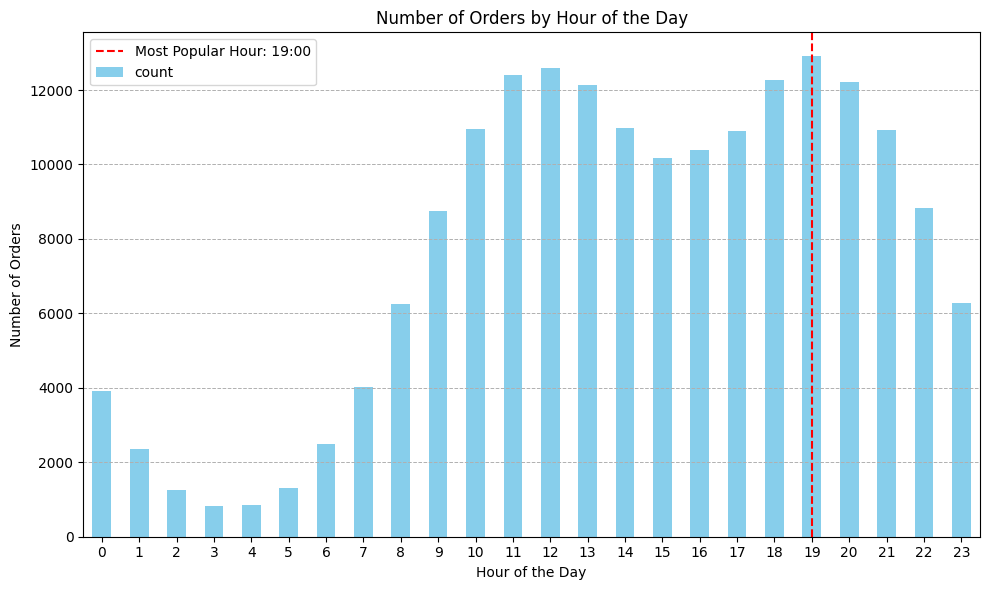

In [18]:
# Count the occurrences of each hour
hour_counts = df_all_data['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of the Day')
plt.xticks(ticks=range(24), rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Highlight the most popular hour
plt.axvline(x=hour_counts.index.get_loc(popular_hour), color='red', linestyle='--', label=f'Most Popular Hour: {popular_hour}:00')
plt.legend()

plt.tight_layout()
plt.show()


### Question 4: What two products are most often sold together?

In [19]:
df = df_all_data[df_all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ', '.join(x))
df2 = df[['Order ID' , 'Grouped']].drop_duplicates()
df2

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)


('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


### Question 5: What product sold the most?

In [21]:
# Exclude datetime columns before grouping and summing
product_group = df_all_data.drop(columns=['Order Date']).groupby('Product').sum().reset_index()

max_qty = product_group['Quantity Ordered'].max()
max_sales_product = product_group[product_group['Quantity Ordered'] == max_qty]['Product']

print(f"The product that was sold the most is {max_sales_product.values[0]}")

The product that was sold the most is AAA Batteries (4-pack)


### A gragh for the most sold product

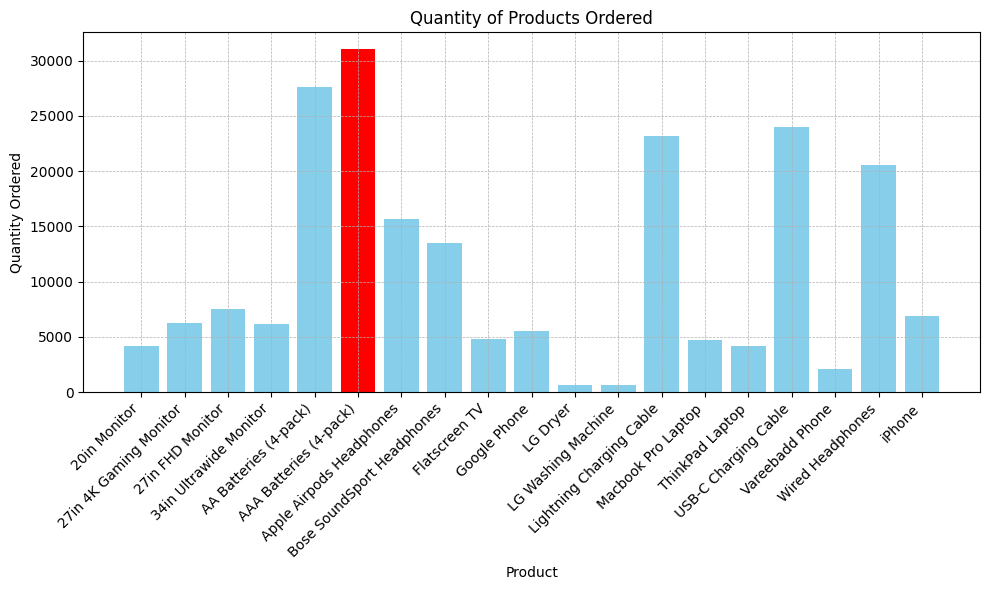

In [22]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.bar(product_group['Product'], product_group['Quantity Ordered'], color='skyblue')

plt.bar(max_sales_product.values[0], max_qty, color='red')

plt.title('Quantity of Products Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
